In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from gaia_spec import *
from lsst.sims.photUtils import Sed, Bandpass

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/yoachim/gitRepos/sims_catalogs/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/yoachim/gitRepos/sims_catalogs/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


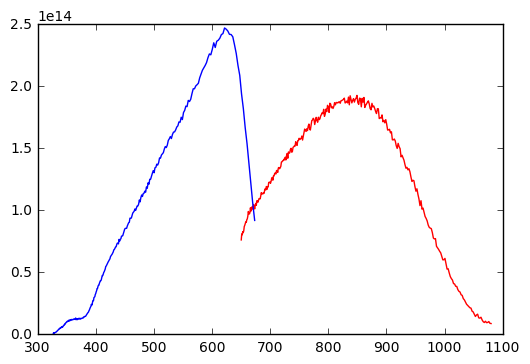

In [2]:
response = gaia_response()
plt.plot(response.red_wavelen, 1./response.red_response, color='r')
plt.plot(response.blue_wavelen, 1./response.blue_response, color='b')


Opening cache of LSST SEDs in:
/Users/yoachim/gitRepos/sims_photutils/cacheDir/lsst_sed_cache.p


(200, 1400)

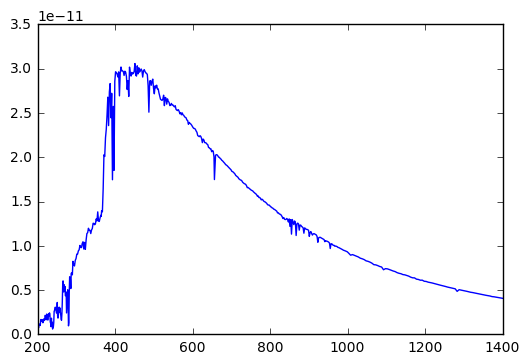

In [3]:
mag = 8
sed = Sed()
sed.read_close_SED(6000., 0., 4.4)
imsimBand = Bandpass()
imsimBand.imsimBandpass()
fNorm = sed.calcFluxNorm(mag, imsimBand)
sed.multiplyFluxNorm(fNorm)
plt.plot(sed.wavelen, sed.flambda)
plt.xlim([200,1400])

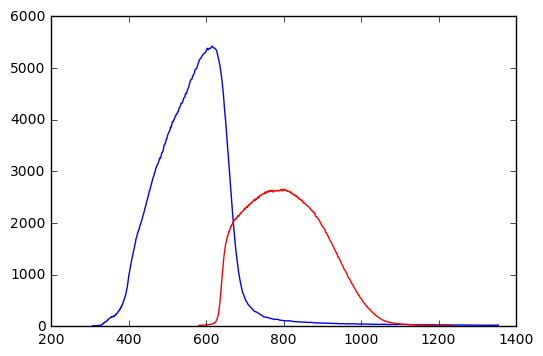

In [4]:
gaia_sed = SED2GAIA(sed)
plt.plot(gaia_sed['BP_wave'], gaia_sed['noisySpec'][0]['BPNoisySpec'], color='b')
plt.plot(gaia_sed['RP_wave'], gaia_sed['noisySpec'][0]['RPNoisySpec'], color='r')

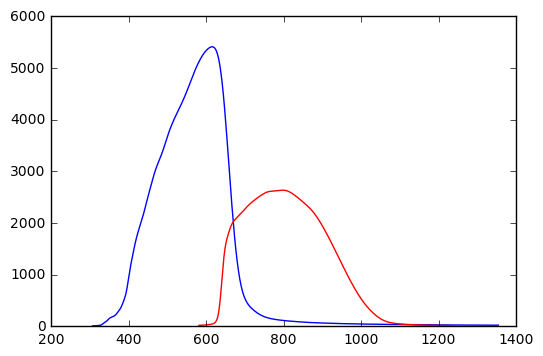

In [5]:
plt.plot(gaia_sed['BP_wave'], gaia_sed['noiseFreeSpec']['BPNoiseFreeSpec'], color='b')
plt.plot(gaia_sed['RP_wave'], gaia_sed['noiseFreeSpec']['RPNoiseFreeSpec'], color='r')

In [6]:
blue_normed = response.apply(gaia_sed['noisySpec'][0]['BPNoisySpec'],  blue=True)
red_normed = response.apply(gaia_sed['noisySpec'][0]['RPNoisySpec'],  blue=False)

(300, 1400)

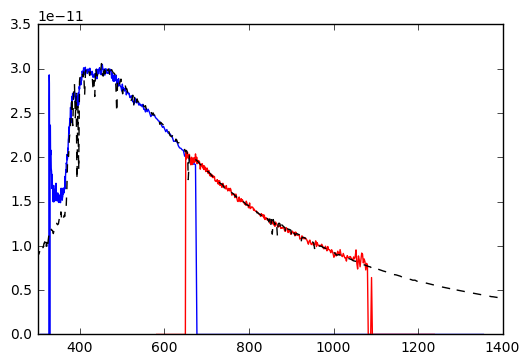

In [7]:
plt.plot(gaia_sed['BP_wave'], blue_normed, color='b')
plt.plot(gaia_sed['RP_wave'], red_normed, color='r')
plt.plot(sed.wavelen, sed.flambda, 'k--')
plt.xlim([300,1400])
#plt.ylim([0,1e-14])

/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:800: UserWarning: There is an area of non-overlap between desired wavelength range (306.64 to 1238.64) and sed FromArray (581.50 to 1238)
  % (wavelen_grid.min(), wavelen_grid.max(), self.name, wavelen.min(), wavelen.max()))
gaia_spec.py:155: RuntimeWarning: divide by zero encountered in divide
  red_weight = 1./red_sed.flambda
gaia_spec.py:156: RuntimeWarning: divide by zero encountered in divide
  blue_weight = 1./blue_sed.flambda
gaia_spec.py:165: RuntimeWarning: invalid value encountered in divide
  flambda = (red_sed.flambda*red_weight + blue_sed.flambda*blue_weight) / (red_weight + blue_weight)


(300, 1400)

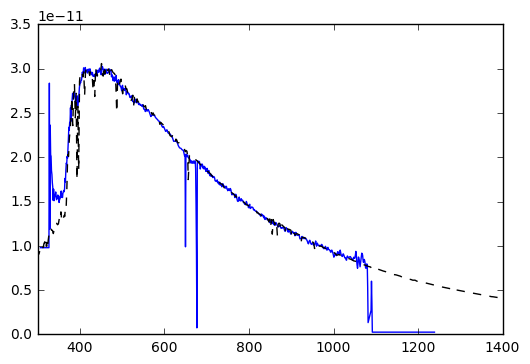

In [8]:
rt_sed = ulysses2SED(data=gaia_sed)
not_nan = ~np.isnan(rt_sed.flambda)
# Let's interpolate out any nans
rt_sed.flambda = np.interp(rt_sed.wavelen, rt_sed.wavelen[not_nan], rt_sed.flambda[not_nan], )
plt.plot(rt_sed.wavelen, rt_sed.flambda)
plt.plot(sed.wavelen, sed.flambda, 'k--')
plt.xlim([300,1400])

(300, 1400)

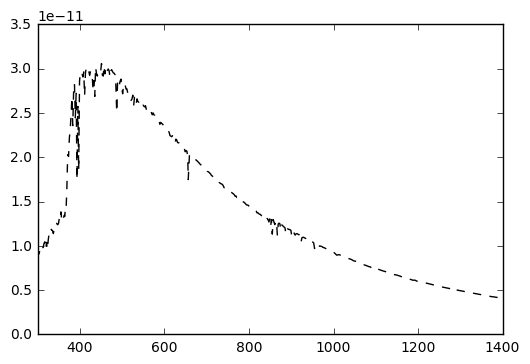

In [9]:
plt.plot(sed.wavelen, sed.flambda, 'k--')
plt.xlim([300,1400])

In [10]:
bps = lsst_filters()

In [11]:
for key in bps:
    print key, sed.calcMag(bps[key]),rt_sed.calcMag(bps[key]), ( sed.calcMag(bps[key])-rt_sed.calcMag(bps[key]))*1e3

g 8.0626928721 8.0596835542 3.00931789602
i 7.68488649744 7.68567086123 -0.784363784746
r 7.7670099484 7.79399387633 -26.9839279324
u 9.09666532887 nan nan
y 7.66816777904 7.6682704327 -0.102653656249
z 7.67216370203 7.67196518071 0.198521322424


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:800: UserWarning: There is an area of non-overlap between desired wavelength range (305.40 to 408.50) and sed FromArray (306.64 to 1239)
  % (wavelen_grid.min(), wavelen_grid.max(), self.name, wavelen.min(), wavelen.max()))


In [12]:
bps = stubb_fitlers()
for key in bps:
    print key, sed.calcMag(bps[key]),rt_sed.calcMag(bps[key]), ( sed.calcMag(bps[key])-rt_sed.calcMag(bps[key]))*1e3

y_truncated 7.66760363217 7.66755101244 0.0526197333208
u_truncated 8.6582532378 8.60175490493 56.4983328688
